In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercícios:

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.


In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             29071 non-null  float64
 1   tempo_educacao    29170 non-null  int64  
 2   estado_civil      29170 non-null  object 
 3   cor               29170 non-null  object 
 4   sexo              29170 non-null  object 
 5   horas_por_semana  29170 non-null  int64  
 6   salario_anual     29170 non-null  object 
 7   nome              0 non-null      float64
 8   dívida            0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


2 - Quais as dimensões do dataframe?

In [3]:
print(df.shape)

(29170, 9)



3 - Qual o tipo das variáveis?

In [4]:
print(df.dtypes)

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object


4 - Existem variáveis faltantes no dataset? Quais?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             29071 non-null  float64
 1   tempo_educacao    29170 non-null  int64  
 2   estado_civil      29170 non-null  object 
 3   cor               29170 non-null  object 
 4   sexo              29170 non-null  object 
 5   horas_por_semana  29170 non-null  int64  
 6   salario_anual     29170 non-null  object 
 7   nome              0 non-null      float64
 8   dívida            0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


In [6]:
df.isnull().sum()

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

In [7]:
print(df['estado_civil'].unique())
print(df['cor'].unique())
print(df['sexo'].unique())
df.loc[:, ['estado_civil','cor','sexo']]
df.sexo.value_counts()

['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']
['White' 'Black' 'Other' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo']
['Male' 'Female' '?']


Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

In [8]:
df.cor.value_counts()
#Temos variáveis faltantes em sexo

White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

## Existem dados faltantes na variável Sexo

6 - Faça um tratamento nas variáveis faltantes.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             29071 non-null  float64
 1   tempo_educacao    29170 non-null  int64  
 2   estado_civil      29170 non-null  object 
 3   cor               29170 non-null  object 
 4   sexo              29170 non-null  object 
 5   horas_por_semana  29170 non-null  int64  
 6   salario_anual     29170 non-null  object 
 7   nome              0 non-null      float64
 8   dívida            0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


In [10]:
moda_variavel_sexo = df.sexo.value_counts().idxmax()
moda_variavel_sexo

'Male'

In [11]:
pd.options.mode.chained_assignment = None

In [12]:
df['sexo'][(df['sexo']=='?')] = moda_variavel_sexo

In [13]:
df.sexo.value_counts()

Male      20118
Female     9052
Name: sexo, dtype: int64

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             29071 non-null  float64
 1   tempo_educacao    29170 non-null  int64  
 2   estado_civil      29170 non-null  object 
 3   cor               29170 non-null  object 
 4   sexo              29170 non-null  object 
 5   horas_por_semana  29170 non-null  int64  
 6   salario_anual     29170 non-null  object 
 7   nome              0 non-null      float64
 8   dívida            0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


In [16]:
X = df.tempo_educacao.values.reshape(-1,1)
X

array([[13],
       [13],
       [ 9],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [17]:
mm_scaler.fit(X)

MinMaxScaler()

In [18]:
ss_scaler.fit(X)

StandardScaler()

In [19]:
mm_scaler.transform(X)

array([[0.8       ],
       [0.8       ],
       [0.53333333],
       ...,
       [0.53333333],
       [0.53333333],
       [0.53333333]])

In [20]:
ss_scaler.transform(X)

array([[ 1.18189294],
       [ 1.18189294],
       [-0.48830542],
       ...,
       [-0.48830542],
       [-0.48830542],
       [-0.48830542]])

In [21]:
pd.DataFrame(np.c_[mm_scaler.transform(X), ss_scaler.transform(X)], columns=["MinMax_tempo","Standard_horas"])

,MinMax_tempo,Standard_horas
0,0.800000,1.181893
1,0.800000,1.181893
2,0.533333,-0.488305
3,0.400000,-1.323405
4,0.866667,1.599443
...,...,...
29165,0.733333,0.764343
29166,0.533333,-0.488305
29167,0.533333,-0.488305
29168,0.533333,-0.488305


8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
variavel_ohe = df.estado_civil.values.reshape(-1,1)

In [23]:
ohe.fit(variavel_ohe)

OneHotEncoder()

In [24]:
ohe.transform(variavel_ohe)
ohe.transform(variavel_ohe).toarray()


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [25]:
ohe.categories_


[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [26]:
dataframe_OHE = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), 
                             columns = ohe.categories_[0].tolist())


In [27]:
dataframe_OHE


,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29165,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
pd.concat([df, dataframe_OHE], axis = 1)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0


9 - Detecte e elimine os outliers da variável 'idade'.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             29071 non-null  float64
 1   tempo_educacao    29170 non-null  int64  
 2   estado_civil      29170 non-null  object 
 3   cor               29170 non-null  object 
 4   sexo              29170 non-null  object 
 5   horas_por_semana  29170 non-null  int64  
 6   salario_anual     29170 non-null  object 
 7   nome              0 non-null      float64
 8   dívida            0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


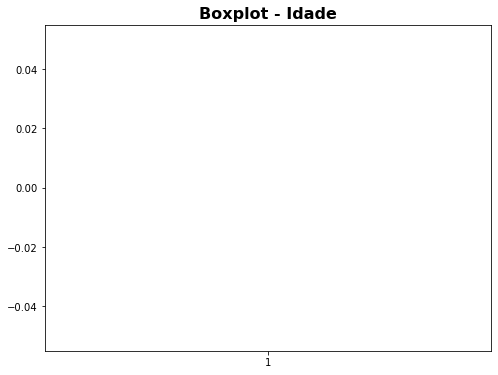

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df.idade)
plt.show()

In [31]:
media_idade=df.idade.mean()
df.idade=df.idade.fillna(media_idade)

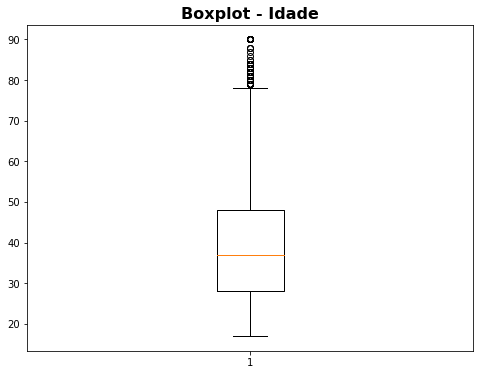

In [32]:
plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df.idade)
plt.show()

In [33]:
#primeiramente, calculamos o intervalo interquartil

iqr = np.percentile(df.idade, 75) - np.percentile(df.idade, 25)
iqr

20.0

In [34]:
limite_inf = np.maximum(np.percentile(df.idade, 25) - 1.5 * iqr, np.min(df.idade))
limite_inf

17.0

In [35]:
limite_sup = np.minimum(np.percentile(df.idade, 75) + 1.5 * iqr, np.max(df.idade))
limite_sup

78.0

In [36]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [37]:
df['outlier_area'] = detecta_outlier(df.idade)

In [38]:
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida,outlier_area
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN,0
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN,0
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN,0
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN,0


In [39]:
df2=df[df.outlier_area==0]

In [40]:
df2.outlier_area.value_counts()

0    29044
Name: outlier_area, dtype: int64

10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [41]:
def preprocessamento(df,num_faltante,cat_faltante,col_ohe,col_mmscaler,col_ssscaler,col_outlier):
    import pandas as pd
    import numpy as np
    import sklearn.preprocessing as sklp
    
    dff=df.copy()
    temp=(df.isnull().sum()/df.shape[0])>=0.8
    var_faltantes=temp.loc[temp==True].index.tolist()
    for v in var_faltantes:
        dff=dff.drop(v,axis=1)
    
    num_faltante=list(set(num_faltante).intersection(set(dff.columns.tolist())))
    cat_faltante=list(set(cat_faltante).intersection(set(dff.columns.tolist())))
    col_ohe=list(set(col_ohe).intersection(set(dff.columns.tolist())))
    col_mmscaler=list(set(col_mmscaler).intersection(set(dff.columns.tolist())))
    col_ssscaler=list(set(col_ssscaler).intersection(set(dff.columns.tolist())))
    col_outlier=list(set(col_outlier).intersection(set(dff.columns.tolist())))
    
    for v in num_faltante:
        dff[v]=dff[v].fillna(dff[v].mean())
    for v in cat_faltante:
        moda=dff[v].value_counts().idxmax()
        dff[v]=dff[v].fillna(moda)
    for v in col_ohe:
        ohe=sklp.OneHotEncoder()
        x=dff[v].values.reshape(-1,1)
        ohe.fit(x)
        dff1=pd.DataFrame(ohe.transform(x).toarray(),columns=list(ohe.categories_[0]))
        
    for v in col_mmscaler:
        mm_scaler=sklp.MinMaxScaler()
        y=dff[v].values.reshape(-1,1)
        mm_scaler.fit(y)
        dff2=pd.DataFrame(data=mm_scaler.transform(y),columns=["MinMax_tempo"])
    for v in col_ssscaler:
        ss_scaler=sklp.StandardScaler()
        z=dff[v].values.reshape(-1,1)
        ss_scaler.fit(z)
        dff3=pd.DataFrame(ss_scaler.transform(z),columns=["norm_padrao_horas"])
    for v in col_outlier:
        lim=1.5
        q=np.percentile(dff[v],75)-np.percentile(dff[v],25)
        lim_sup=np.minimum(np.percentile(dff[v],75)+lim*q,np.max(dff[v]))
        lim_inf=np.maximum(np.percentile(dff[v],25)-lim*q,np.min(dff[v]))
        dff4= pd.DataFrame(np.c_[np.where((dff[v]<lim_inf)|(dff[v]>lim_sup),1,0)],columns=["out_idade1"])
    dff=pd.concat([dff,dff1,dff2,dff3,dff4],axis=1)
    return dff    

In [42]:
dff=preprocessamento(df=df,num_faltante=["idade"],cat_faltante=["sexo"],col_ohe=["cor"],col_mmscaler=["tempo_educacao"],col_ssscaler=["horas_por_semana"],col_outlier=["idade"])

In [43]:
dff.columns

Index(['idade', 'tempo_educacao', 'estado_civil', 'cor', 'sexo',
       'horas_por_semana', 'salario_anual', 'outlier_area',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'MinMax_tempo', 'norm_padrao_horas', 'out_idade1'],
      dtype='object')

In [44]:
dff.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_area,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,MinMax_tempo,norm_padrao_horas,out_idade1
0,39.0,13,Never-married,White,Male,40,<=50K,0,0.0,0.0,0.0,0.0,1.0,0.800000,-0.03606,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0,0.0,0.0,0.0,0.0,1.0,0.800000,-2.21050,0
2,38.0,9,Divorced,White,Male,40,<=50K,0,0.0,0.0,0.0,0.0,1.0,0.533333,-0.03606,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0,0.0,0.0,1.0,0.0,0.0,0.400000,-0.03606,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0,0.0,0.0,0.0,0.0,1.0,0.866667,-0.03606,0
